In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

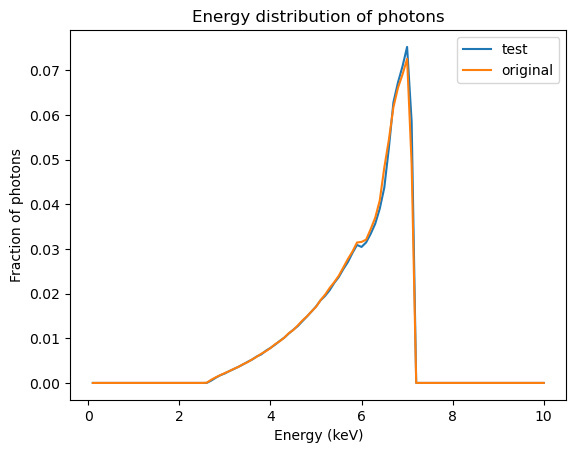

In [62]:
# set precision
precision = 4

# read data .dat file
data_1 = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\e-{}.dat'.format(precision), sep=' ', header=None)

data_ori = pd.read_csv(r'C:\Users\WalkerXin\Downloads\ironline\e-{}.dat'.format(precision), sep=' ', header=None)

#plot second column against first column
plt.plot(data_1.iloc[:,0], data_1.iloc[:,1], label="test")
plt.plot(data_ori.iloc[:,0], data_ori.iloc[:,1], label="original")
plt.xlabel("Energy (keV)")
plt.ylabel("Fraction of photons")
plt.title("Energy distribution of photons")
plt.legend()
plt.show()

In [63]:
data_mod = pd.read_csv(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\e-{}_mod.dat'.format(precision), sep=' ', header=None)

#plot second column against first column
plt.plot(data_mod.iloc[:,0], data_1.iloc[:,1], label="test")
plt.plot(data_ori.iloc[:,0], data_ori.iloc[:,1], label="original")
plt.xlabel("Energy (keV)")
plt.ylabel("Fraction of photons")
plt.title("Energy distribution of photons")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\WalkerXin\\Documents\\Scripts\\raytransfer\\ironline\\e-4_mod.dat'